In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

muskmelon      100
kidneybeans    100
papaya         100
pigeonpeas     100
blackgram      100
cotton         100
mothbeans      100
mungbean       100
watermelon     100
orange         100
mango          100
banana         100
rice           100
pomegranate    100
chickpea       100
apple          100
jute           100
grapes         100
lentil         100
coffee         100
maize          100
coconut        100
Name: label, dtype: int64

<Axes: >

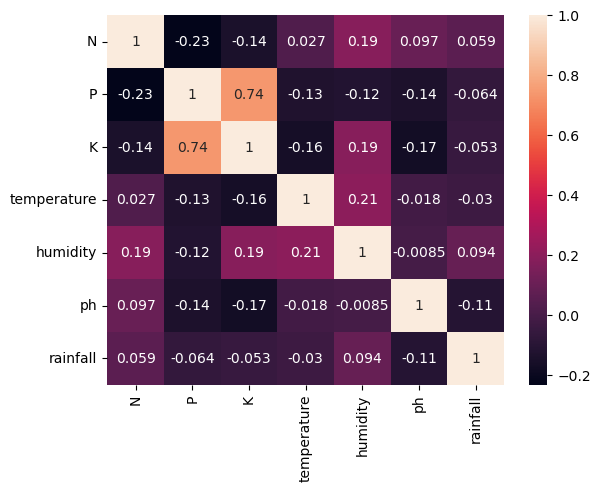

In [13]:
numeric_columns = df.select_dtypes(include=['number'])

sns.heatmap(numeric_columns.corr(), annot=True)

# EDA

# Outliers Detection

Variable Name : N


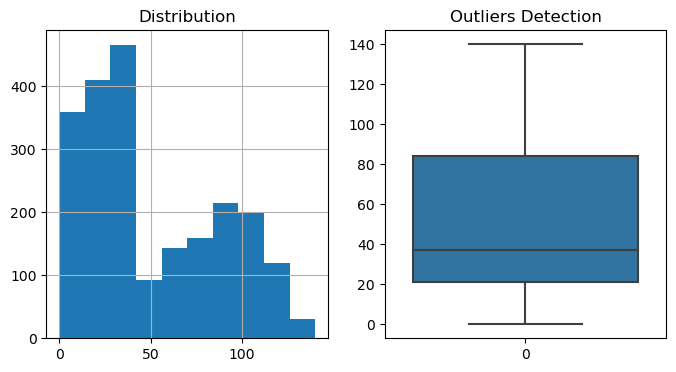



Variable Name : P


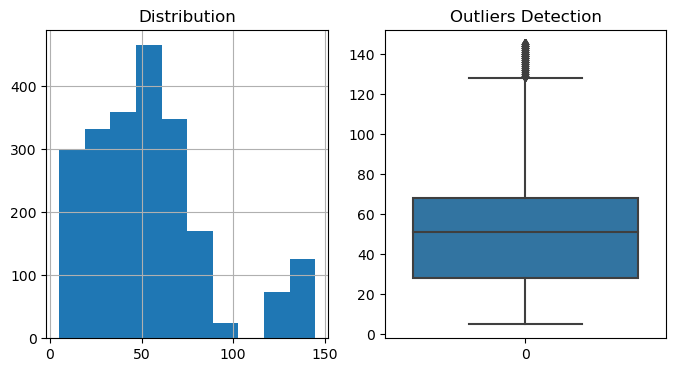



Variable Name : K


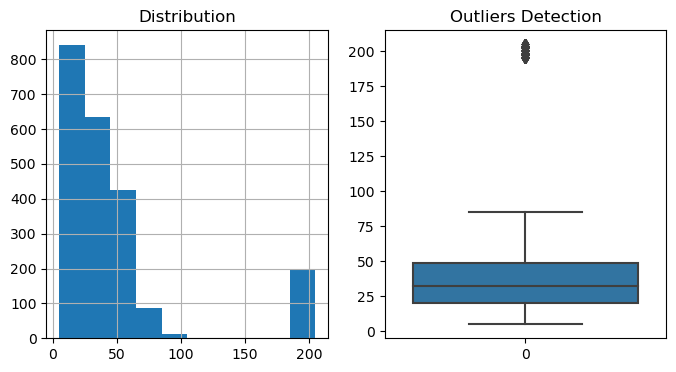



Variable Name : TEMPERATURE


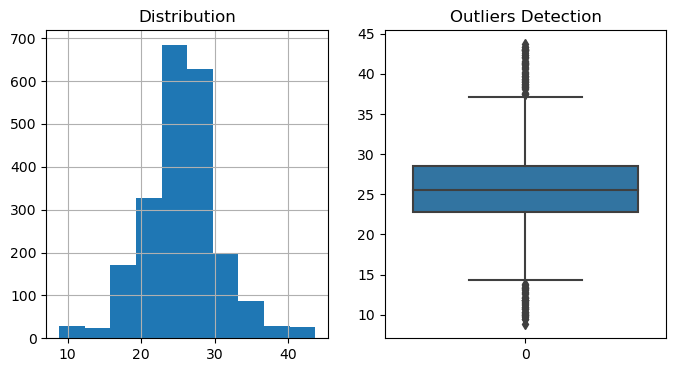



Variable Name : HUMIDITY


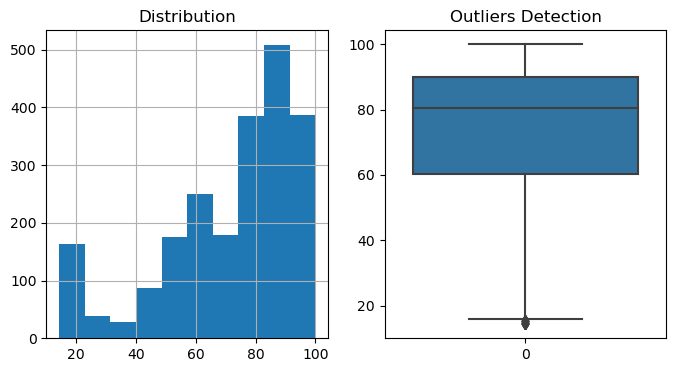



Variable Name : PH


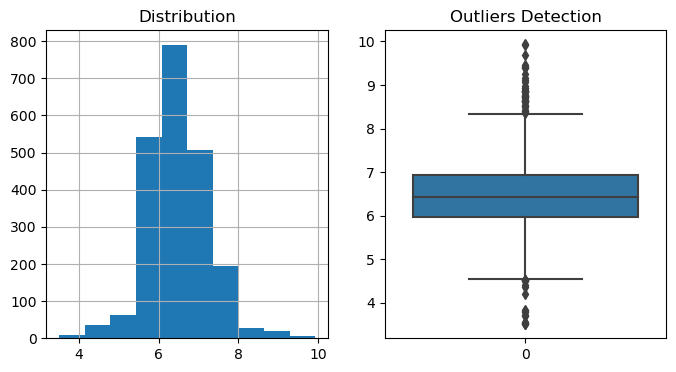

In [97]:
for i in df.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    df[i].hist(ax=axes[0])
    sns.boxplot(df[i],ax=axes[1])
    plt.show()
    print('\n')

Variable : N


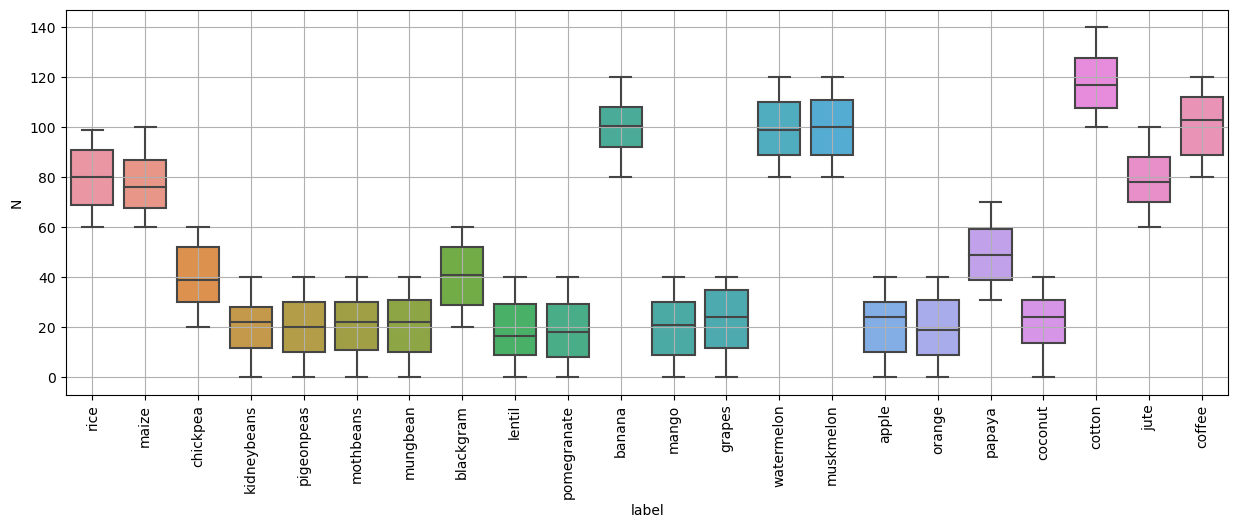

Variable : P


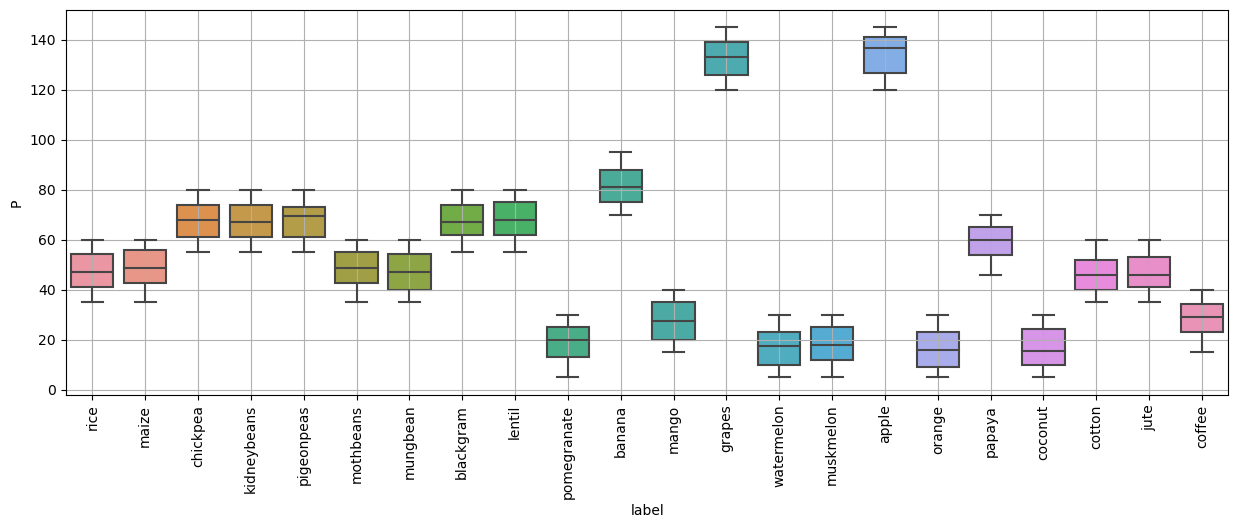

Variable : K


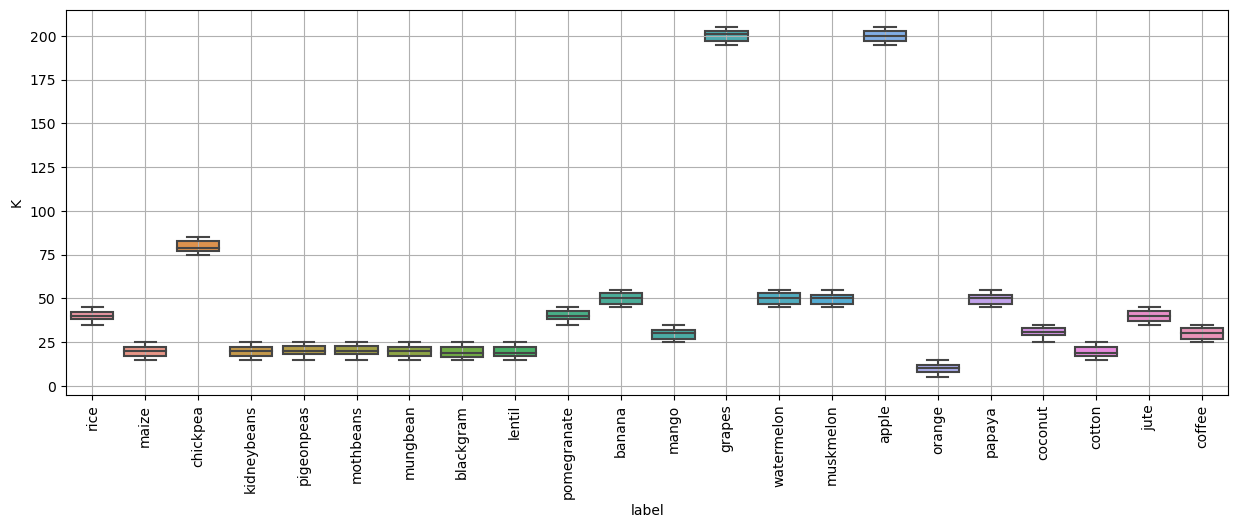

Variable : TEMPERATURE


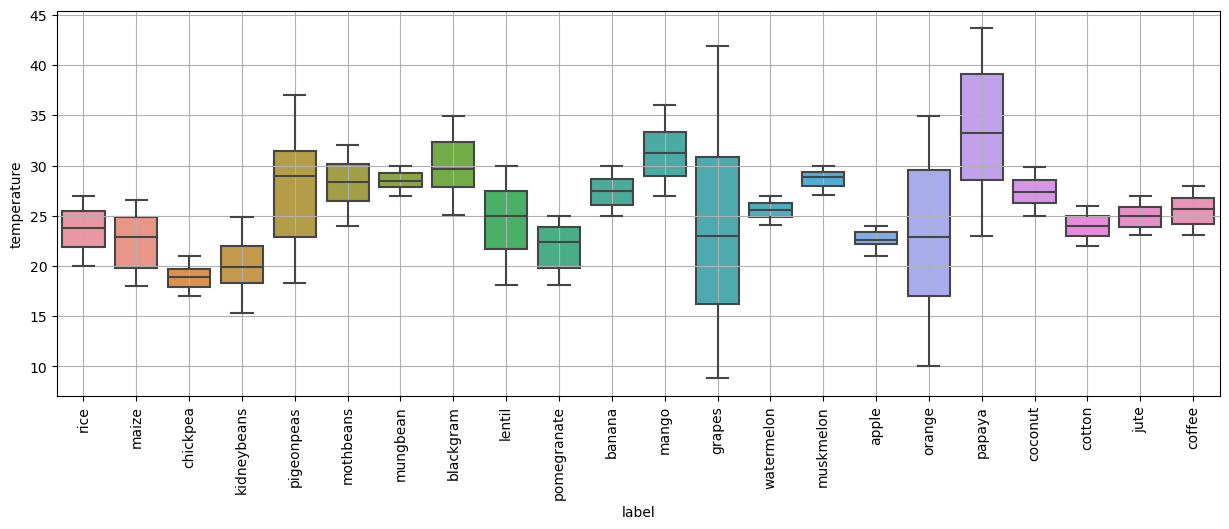

Variable : HUMIDITY


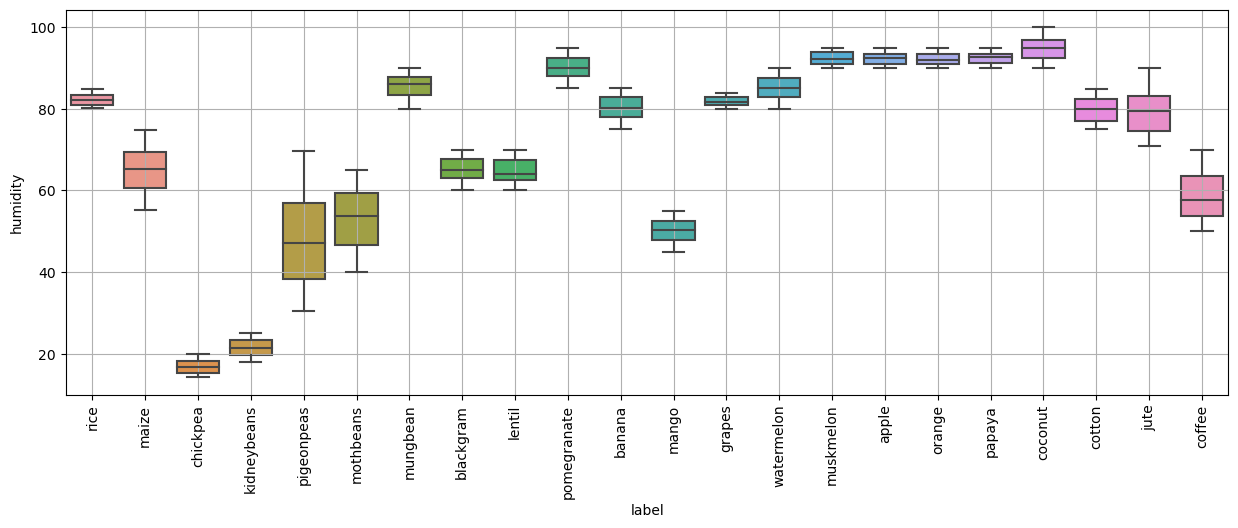

Variable : PH


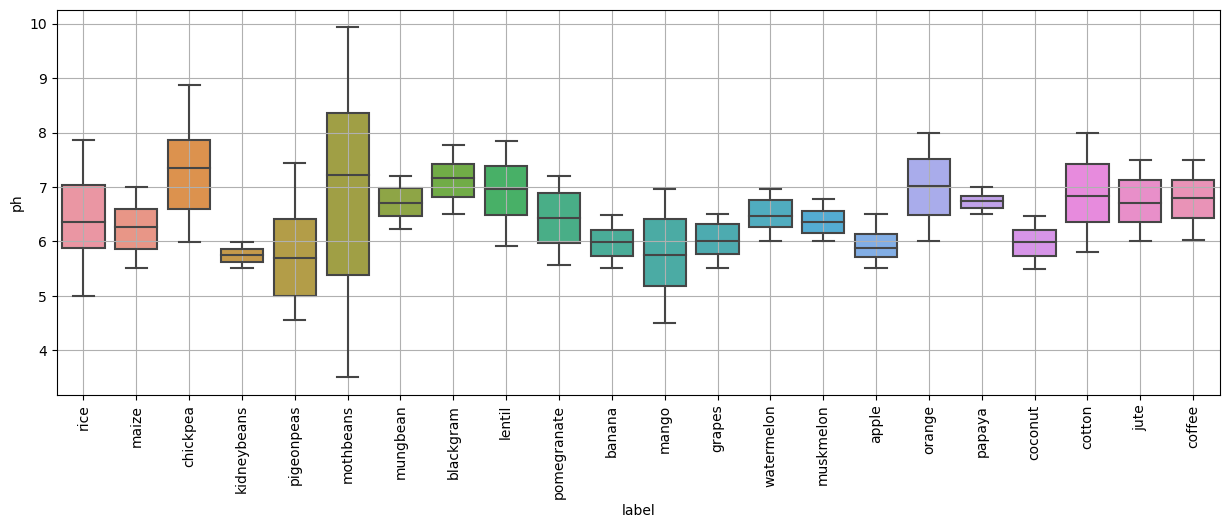

In [98]:
#plotting effect of input variable with output variable
for i in df.columns[:-2]:
    plt.figure(figsize=(15,5))
    print('Variable :',i.upper())
    sns.boxplot(x=df.label,y=df[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

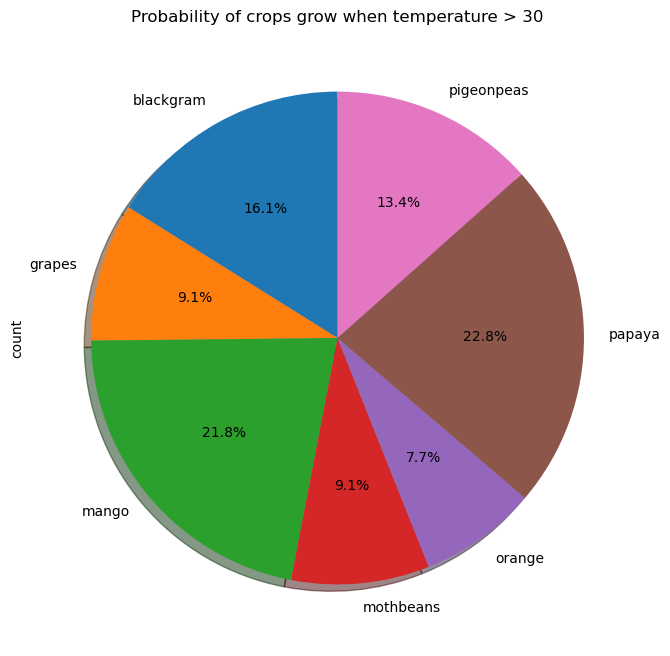

In [99]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(df.label[df.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

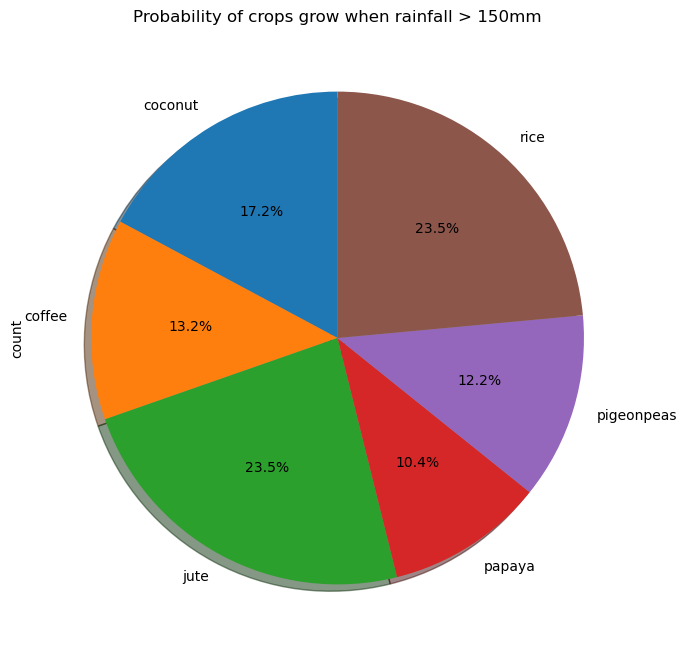

In [100]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(df.label[df.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

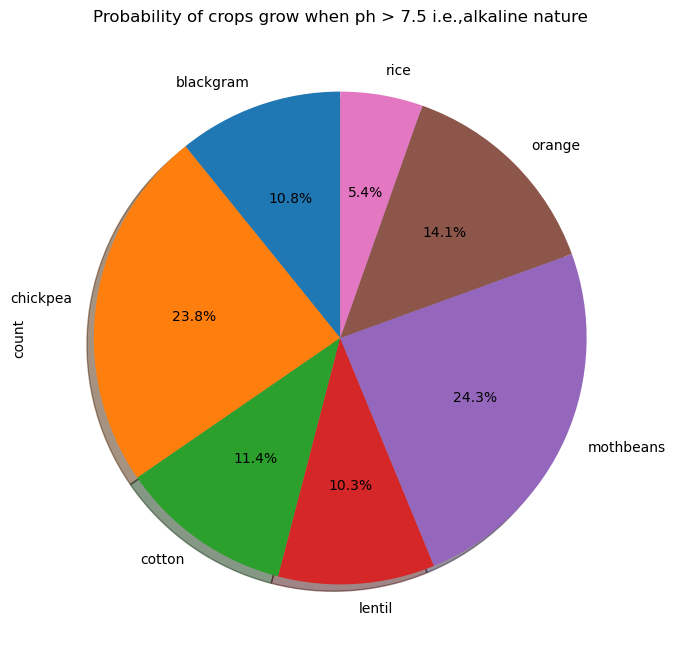

In [101]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(df.label[df.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [63]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [64]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Scale the features using MinMaxScaler

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Standarization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

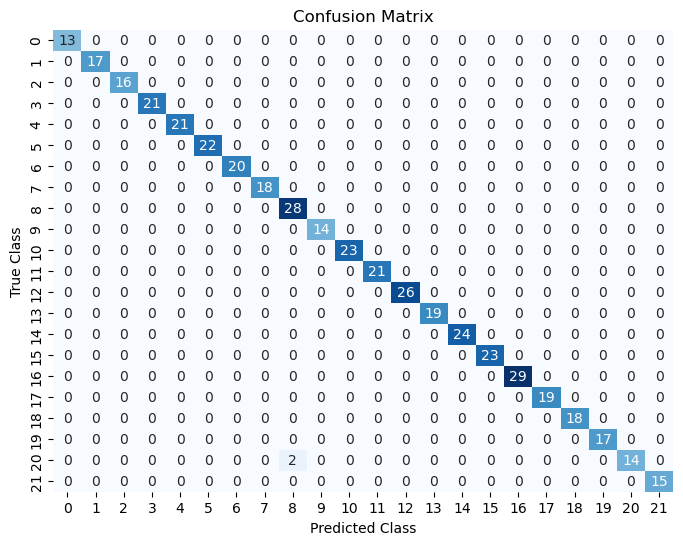

In [56]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Ytest, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=4)

In [70]:
(score)

array([0.93272727, 0.90909091, 0.88363636, 0.93272727])

In [71]:
np.mean(score)

0.9145454545454546

### Saving trained Decision Tree model

In [72]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

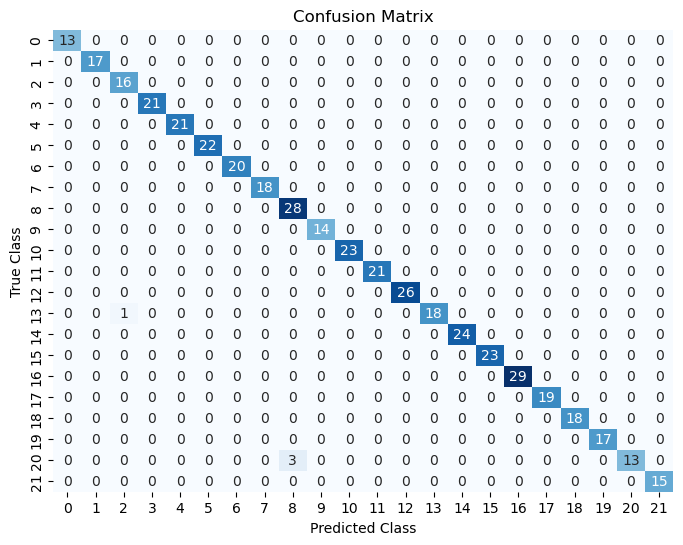

In [93]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Ytest, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [74]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=4)
score

array([0.99818182, 0.99090909, 0.99636364, 0.99272727])

In [75]:
np.mean(score)

0.9945454545454545

### Saving trained Guassian Naive Bayes model

In [76]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [77]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

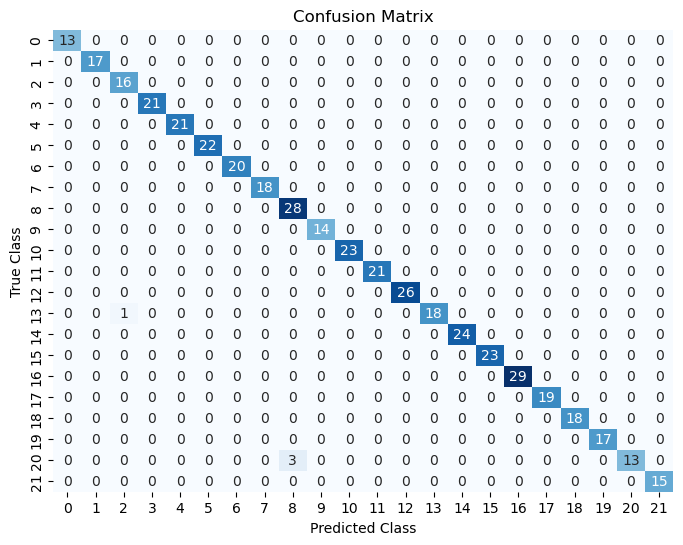

In [94]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Ytest, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [78]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=4)
score

array([0.98363636, 0.98181818, 0.98909091, 0.98      ])

In [79]:
np.mean(score)

0.9836363636363636

In [80]:
#Saving trained SVM model
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

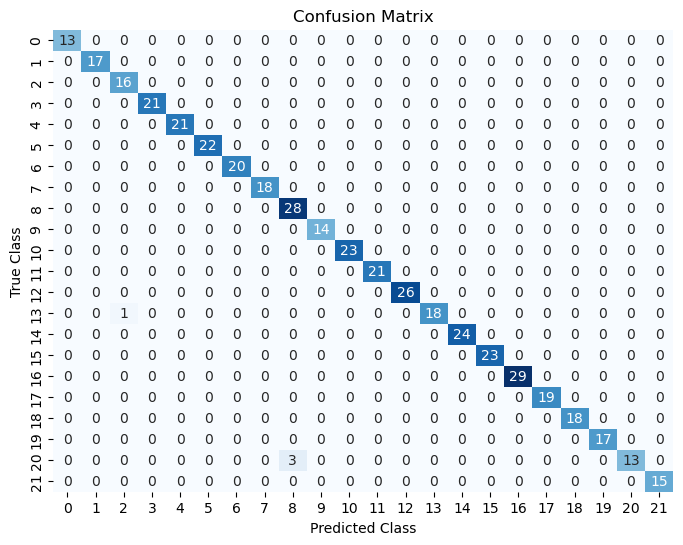

In [95]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Ytest, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [82]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=4)
score

array([0.95272727, 0.94909091, 0.96181818, 0.94727273])

In [83]:
np.mean(score)

0.9527272727272728

### Saving trained Logistic Regression model

In [84]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=20, random_state=0)
RandomForest.fit(Xtrain,Ytrain)

predicted_values = RandomForest.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

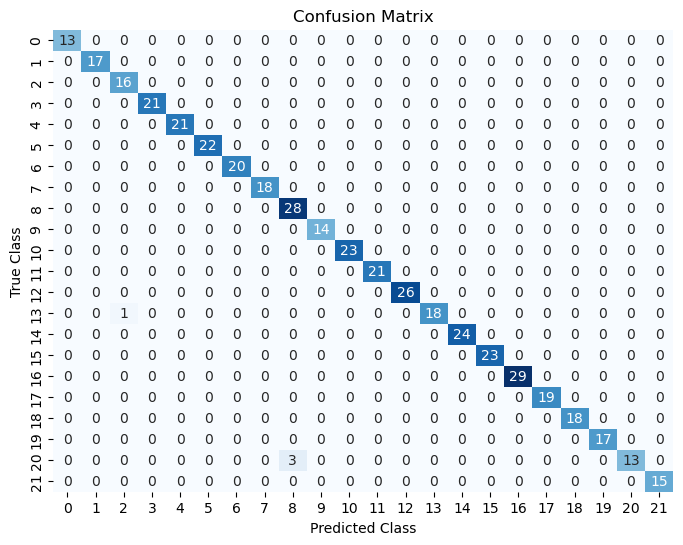

In [96]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Ytest, predicted_values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [86]:
# Cross validation score (Random Forest)
score = cross_val_score(RandomForest,features,target,cv=4)
score

array([0.99454545, 0.99090909, 0.99636364, 0.98181818])

In [87]:
np.mean(score)

0.9909090909090909

### Saving trained Random Forest model

In [88]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

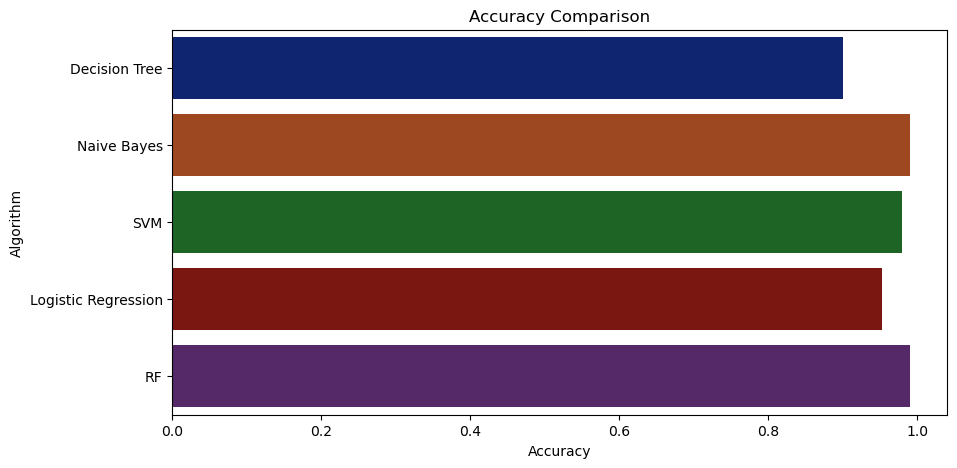

In [89]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [90]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091


## Making a prediction

In [91]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = NaiveBayes.predict(data)
print(prediction)

['coffee']


In [92]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = SVM.predict(data)
print(prediction)

['rice']


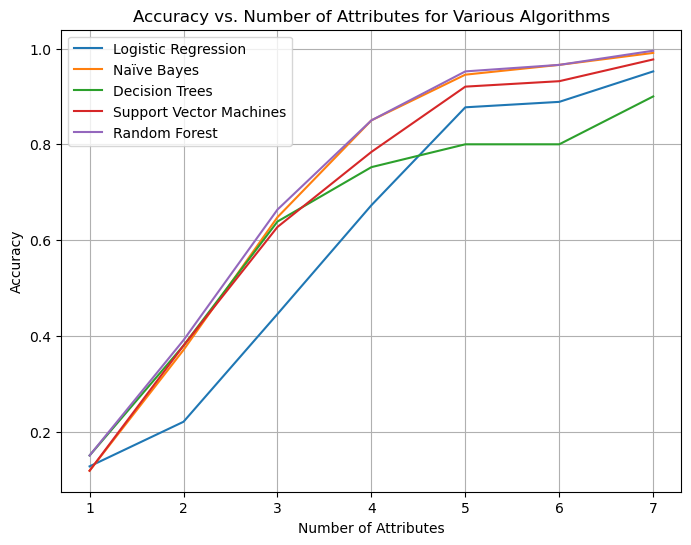

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define lists to store accuracy for each algorithm
accuracies = {
    "Logistic Regression": [],
    "Naïve Bayes": [],
    "Decision Trees": [],
    "Support Vector Machines": [],
    "Random Forest": []
}

# Define the range of number of attributes to consider
max_num_attributes = len(Xtrain.columns)  # Assuming Xtrain is your training data

# Iterate over different numbers of attributes
for n in range(1, max_num_attributes + 1):
    # Select the first n attributes from Xtrain and Xtest
    Xtrain_subset = Xtrain.iloc[:, :n]
    Xtest_subset = Xtest.iloc[:, :n]
    
    # Train and evaluate each algorithm
    for algorithm, accuracies_list in accuracies.items():
        if algorithm == "Logistic Regression":
            model = LogisticRegression(random_state=2)
        elif algorithm == "Naïve Bayes":
            model = GaussianNB()
        elif algorithm == "Decision Trees":
            model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
        elif algorithm == "Support Vector Machines":
            model = SVC(kernel='linear', random_state=2)
        elif algorithm == "Random Forest":
            model = RandomForestClassifier(n_estimators=100, random_state=2)
        
        model.fit(Xtrain_subset, Ytrain)
        predicted_values = model.predict(Xtest_subset)
        accuracy = accuracy_score(Ytest, predicted_values)
        accuracies_list.append(accuracy)

plt.figure(figsize=(8, 6))
for algorithm, accuracies_list in accuracies.items():
    plt.plot(range(1, max_num_attributes + 1), accuracies_list, label=algorithm)

plt.title('Accuracy vs. Number of Attributes for Various Algorithms')
plt.xlabel('Number of Attributes')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
